# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes 

We're going to take the following approach:
1. Problem definition 
2. Data
3. Evaluation 
4. Features 
5. Modeling 
6. Experimentation 

## 1. Problem Definition 

In a statement, 
> Given clinical parameters about a parient, can we predict whether or not they have a hear disease 

## 2. Data

the Original data came from Cleavland data from the UCI Machine Learning Repo. 

there's also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has a heart disease during the proof of concept, we will pursue the project. 

## 4. Features 

This is where you will get different information about each of the features in your data

**Create a data dictionary**


* age age in years

* sex (1 = male; 0 = female)

* cp chest pain type

* trestbps resting blood pressure (in mm Hg on admission to the hospital)

* chol serum cholestoral in mg/dl

* fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

* restecg resting electrocardiographic results

* thalach maximum heart rate achieved

* exang exercise induced angina (1 = yes; 0 = no)

* oldpeak ST depression induced by exercise relative to rest

### Preparing the tools


In [3]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns

# to make plot apear inside the notebook
%matplotlib inline

# import models fro Scikit-Learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load the Data

In [4]:
df = pd.read_csv('heart-disease.csv')
df.shape 

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

the goal here is to fully understand the dat 

1. what questions are we trying to solve 
2. what kind of data do we have and how do we treat different types
3. what's missing from the data and how do we deal with it
4. where are the outliers and why should we care about them?
5. how can we add/change/remove features to get more out of our data

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# learning more about the target column
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

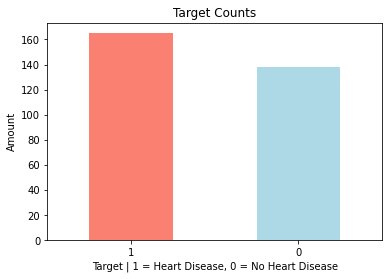

In [7]:
df['target'].value_counts().plot(kind='bar', 
                                 color=['salmon', 'lightblue'], 
                                 xlabel='Target | 1 = Heart Disease, 0 = No Heart Disease',
                                 ylabel='Amount',
                                 title='Target Counts');
plt.xticks(rotation=0)
# this is a relativly balanced data set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease fequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# compare target column wiht sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

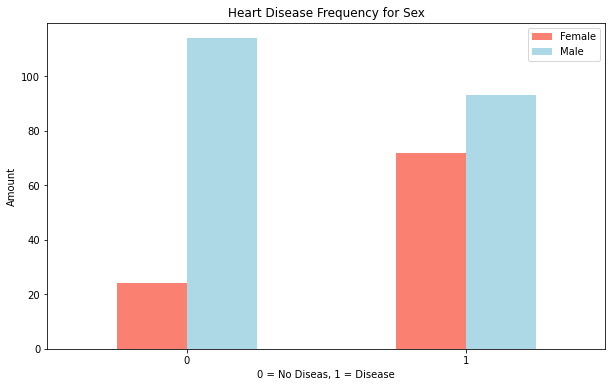

In [13]:
# create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Diseas, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

### Compare the target with fasting blood sugar

In [14]:
pd.crosstab(df.target, df.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


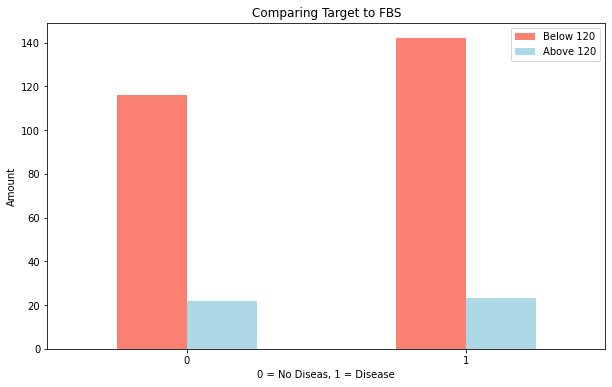

In [15]:
pd.crosstab(df.target, df.fbs).plot(kind='bar',
                                    color=['salmon', 'lightblue'],
                                    figsize=(10,6))
plt.title('Comparing Target to FBS')
plt.xlabel('0 = No Diseas, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Below 120', 'Above 120'])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

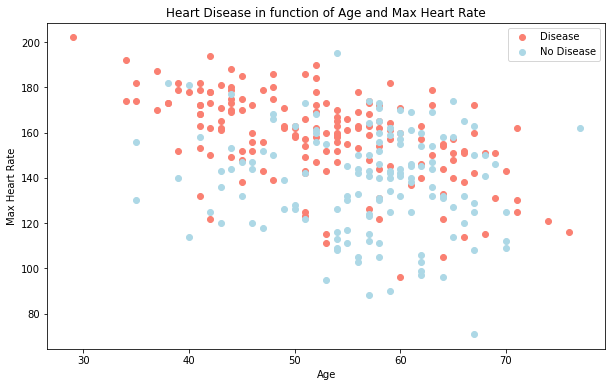

In [16]:
plt.figure(figsize=(10,6))

# Scatter for postive samples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Scatter for negative samples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

Text(0.5, 0, 'Age')

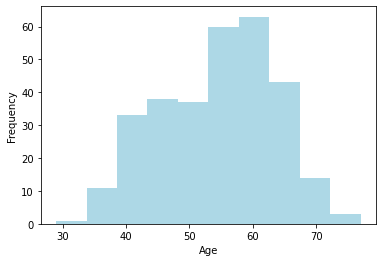

In [17]:
# Check the distribution of the age column with histogram
df.age.plot.hist(color=('lightblue'))
plt.xlabel('Age')

### Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type
* 0: Typical angina
* 1: Atypical angina
* 2: Non-angina pain
* 3: Asymptomatic

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


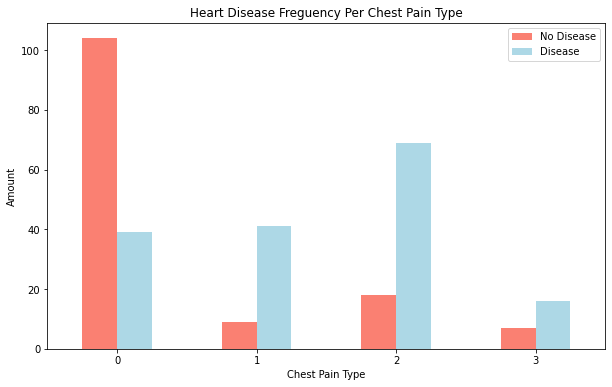

In [19]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Freguency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### Make a correlation matrix

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


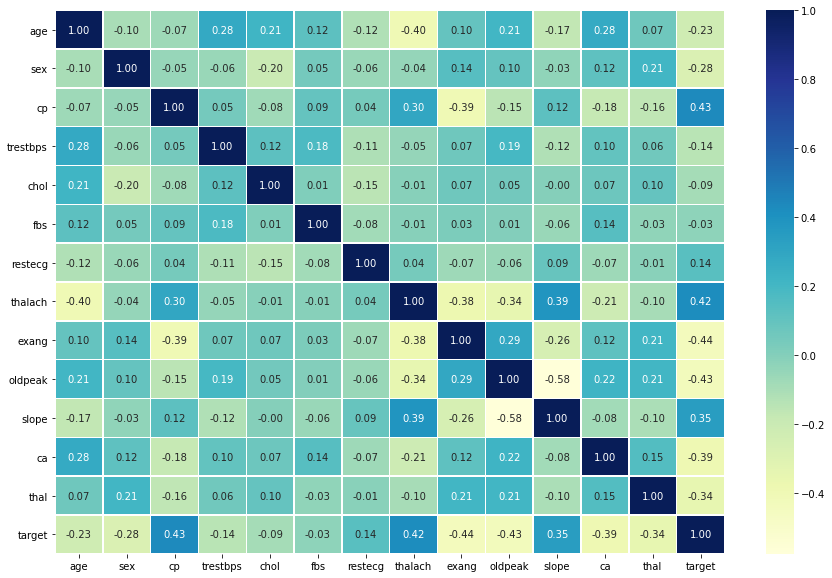

In [21]:
# plot the correlation matrix 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

# 5. Modeling

In [22]:
# Split the data into target and features
X = df.drop(['target'], axis=1)
y = df['target']

In [23]:
# Split the data into training and testing 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

### Models will be tested 
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifer

In [24]:
# models dict
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit-Learn machine learning models.
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: testing labels 
    '''
    # setup random seed
    np.random.seed(42)
    # make a dict to keep model scores
    model_scores = {}
    # loop through the models 
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [25]:
models_scores = fit_and_score(models=models, 
                              X_train=X_train, 
                              X_test=X_test, 
                              y_train=y_train, 
                              y_test=y_test)

models_scores

/Users/mohaimenmacbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

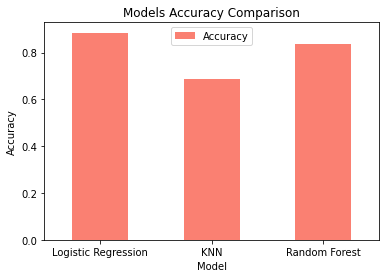

In [26]:
model_compare = pd.DataFrame(models_scores, index=['Accuracy'])
model_compare.T.plot.bar(color='salmon',
                         title='Models Accuracy Comparison',
                         xlabel='Model',
                         ylabel='Accuracy')
plt.xticks(rotation=0)

#### Experimenting with the models
1. Hyperparameter tuning 
2. Feature importance
3. Confusion Matrix
4. Cross-Validation 
5. Precision 
6. Recall
7. F1 Score
8. Classification report
9. ROC curve
10. Area under the curve 

##### Hyperparameter tuning (manually)

In [27]:
# tuning KNN
train_scores = []
test_scores = []

# a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance 
knn = KNeighborsClassifier()

# loop through different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the model 
    knn.fit(X_train, y_train)
    # update training scores list
    train_scores.append(knn.score(X_train, y_train))
    # update the test scores list
    test_scores.append(knn.score(X_test, y_test))
 
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


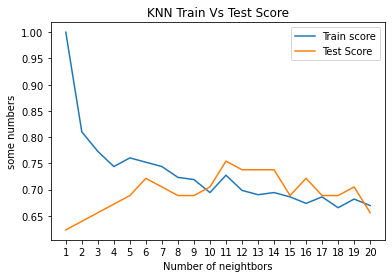

In [60]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1,21,1))
plb.title('KNN Train Vs Test Score')
plb.xlabel('Number of neightbors')
plb.ylabel('some numbers')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

#### Eventhough the score was improved from 68% to 75%, it's still well below the other 2 models, therefore KNN will be discarded

## Hyperparameter tuning with RandomizedSearchCV

Models to be tuned:
* LogisticRegression()
* RandomForestClassifier()

In [30]:
# Tuning LogisticRegression
# creating hyperparameter grid for LogisticRegression 
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 100, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [31]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
# Check out the best paramas to use
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
# check the score of the best paramas
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [34]:
# Tunning RandomForestClassifier
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True)
#fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   13.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [35]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [36]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

In [37]:
# New hyperparameter grid for the LogisticRegression model 
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
# Evaluate the grid search LogisticRegressionSearch
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating the tuned machine learning classifier beyond accuracy 
 
 * ROC Curve and AUC score
 * Confusion martix
 * Classification report
 * Preceision 
 * Recall 
 * F1-Score
 
 
 note: to make comparisons and evaluate our trained model, we need to make predictions.

In [40]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

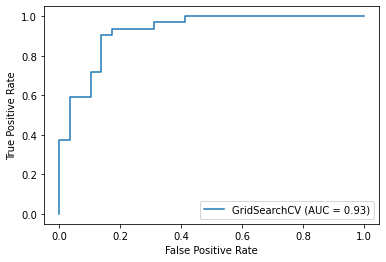

In [62]:
# Plot ROC curve and calculate AUC
plot_roc_curve(gs_log_reg, X_test, y_test)


In [42]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


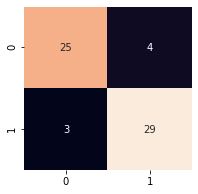

In [66]:
def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plb.xlabel = 'Predicted Label'
    plb.ylabel = 'True Label'

plot_conf_mat(y_test, y_preds)

In [44]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

* precision
* recall 
* f1-score

using `cross_val_score()`

In [45]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# Create a new classifier with best params
clf = LogisticRegression( C=0.20433597178569418,
                          solver='liblinear')

In [47]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [48]:
mean_cv_acc = np.mean(cv_acc)
mean_cv_acc

0.8479781420765027

In [49]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='precision')
mean_cv_precision = np.mean(cv_precision)
mean_cv_precision

0.8215873015873015

In [50]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring='recall')
mean_cv_recall = np.mean(cv_recall)
mean_cv_recall

0.9272727272727274

In [51]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
mean_cv_f1 = np.mean(cv_f1)
mean_cv_f1

0.8705403543192143

<AxesSubplot:title={'center':'Cross-validated Classification metrics'}>

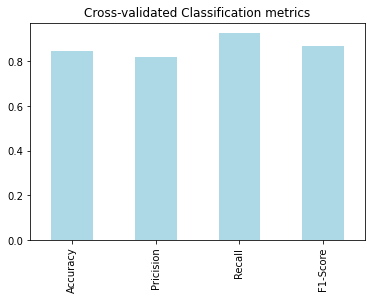

In [68]:
# Visualize Cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': mean_cv_acc,
                           'Pricision': mean_cv_precision,
                           'Recall': mean_cv_recall,
                           'F1-Score': mean_cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title='Cross-validated Classification metrics',
                      legend=False,
                      color='lightblue')

## Feature Importance

In [53]:
# Fit an instance of the model 
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [54]:
# check coef_ it retruns a list of the coef of all features
clf.coef_

array([[ 0.00316728, -0.86044681,  0.66067028, -0.01156993, -0.00166374,
         0.04386098,  0.31275871,  0.02459362, -0.60413098, -0.56862784,
         0.45051633, -0.63609911, -0.67663374]])

In [55]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031672836648050503,
 'sex': -0.8604468104930325,
 'cp': 0.6606702797887507,
 'trestbps': -0.01156993266606034,
 'chol': -0.0016637447948541165,
 'fbs': 0.043860983413115645,
 'restecg': 0.31275871271392713,
 'thalach': 0.024593615341531826,
 'exang': -0.6041309838702352,
 'oldpeak': -0.5686278420079321,
 'slope': 0.45051633355228077,
 'ca': -0.6360991091618156,
 'thal': -0.6766337375624075}

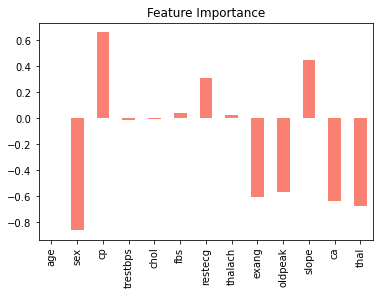

In [69]:
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False, color='salmon');